In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''Definindo o problema sendo sobre encontrar os melhores parâmetros
de intersecção e slope para reta'''

class LR():

    def __init__(self, x,  y, parametros=np.array([0.0,1.0]).reshape(2,1)):
        self.x = x
        self.parametro = parametros
        self.y = y
    
    def estimar(self):

        return self.x.dot(self.parametro)

    def RSS(self):

        predict = self.estimar()
        return sum((self.y-predict)**2)
    
    def gradient(self, predict=None):

        if predict == None:
            predict = self.estimar()

        grad1_l = []
        grad0_l = []

        for i in range(len(self.x)):
            grad1 = -2*(self.y[i] - predict[i])*self.x[i][1]
            grad0 = -2*(self.y[i] - predict[i])

            grad1_l.append(grad1)
            grad0_l.append(grad0)
        return sum(grad0), sum(grad1)
    
    def objetivo(self):

        if round(self.gradient()[0], 10) == 0 and round(self.gradient()[1], 10) == 0:
            print("parametros encontrados")
            return True
        else:
            return False

In [3]:
def Gradient_Descent(problem, learn_rate=0.00001):

    if problem.objetivo():
        return True
    
    while True:
        maxim = problem.gradient()

        problem.parametro[0] = problem.parametro[0] - (maxim[0]*learn_rate)
        problem.parametro[1] = problem.parametro[1] - (maxim[1]*learn_rate)

        if problem.objetivo():
            return True

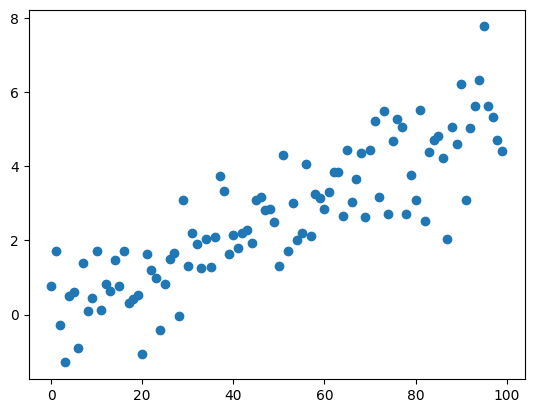

In [7]:
# Iremos utilizar dados fictícios 
y = []
x = []
a = 0
for i in range(100):
    a+=0.05
    x.append(a)
    y.append(a + np.random.normal(0,1))

plt.scatter(x=range(len(x)), y=y)

x = np.array(x)
x = x.reshape((100,1))

In [ ]:
# Criando as arrays com os dados

'''É adicionado 1 na primeira coluna para que
possa ser feito inner product entre os parâmetros e 
variáveis'''
var = np.column_stack(([1 for i in range(100)], x))
parametros = np.array([0.0,0.0]).reshape([2,1])